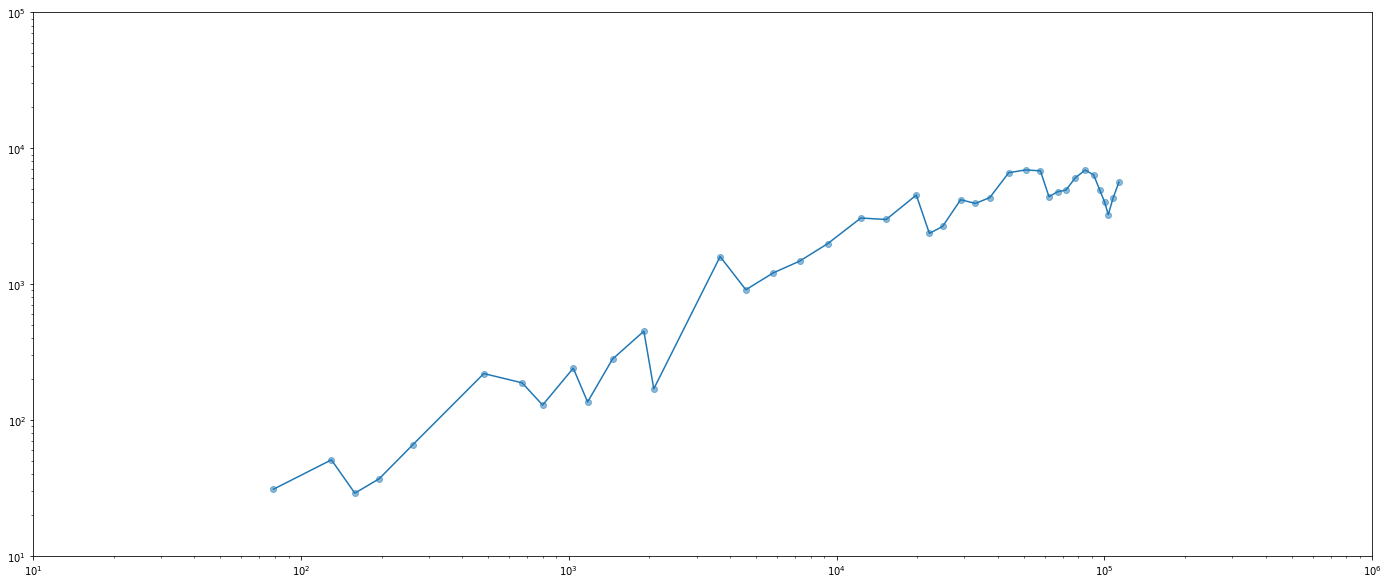

In [2]:
import matplotlib.pyplot as plt

timeseries=[48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,
            7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,
            62095,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296]

zuwachs=[timeseries[i+1]-timeseries[i] for i in range(len(timeseries)-1)]
#zuwachs.insert(0,1)

plt.rcParams['figure.figsize'] = [24, 10]

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(10, 100000)
ax.set_xlim(10, 1000000)

plt.scatter(timeseries[1:len(timeseries)], zuwachs, alpha=0.5)
plt.plot(timeseries[1:len(timeseries)], zuwachs)


plt.show()